# The following Cells need to be executed to get and generate a dataset that has an aggregated count of bike trips per hundredth of an hour through the 24 hours in a day. I put all this here instead of providing you the dataset directly, so that you could learn something along the way :) The assignment is below.

In [2]:
!pip3 install seaborn

In [1]:
!conda env list

# conda environments:
#
mlnn                     /Users/katie/anaconda2/envs/mlnn
py2                      /Users/katie/anaconda2/envs/py2
py3                      /Users/katie/anaconda2/envs/py3
root                  *  /Users/katie/anaconda2



## This cell automatically downloads Capital Bikeshare data

In [2]:
import sys
sys.path.append('..')
from utils.bikeshare import download_bikeshare_data

download_bikeshare_data(2016, 1, '../data/')

Downloading: 2016 Q1 | Extracting... | Created: ../data/2016-Q1-cabi-trip-history-data.csv


### And here we read in the data

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
bikes = pd.read_csv('../data/2016-Q1-cabi-trip-history-data.csv')
bikes.head()
bikes['start'] = pd.to_datetime(bikes['Start date'], infer_datetime_format=True)
bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format=True)

bikes.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00


### Create a new column that represents the hour of the day 

In [4]:
# bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute/60).round(2))
bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute/60))

bikes.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end,hour_of_day
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00,23.983333
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,23.983333
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,23.983333
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00,23.950000
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00,23.950000


### Aggregate to get a count per hour/minute of the day across all trips

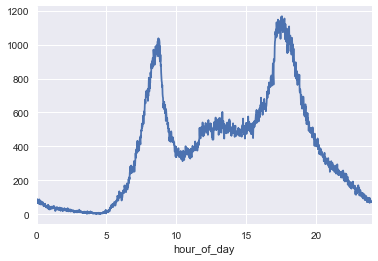

In [5]:
hours = bikes.groupby('hour_of_day').agg('count')

hours['hour'] = hours.index

hours.start.plot()
# import seaborn as sns

# sns.lmplot(x='hour', y='start', data=hours, aspect=1.5, scatter_kws={'alpha':0.2})

# Assignment 4 Cont'd
Using the `bikes` dataframe, create several (min 3) models with 
1. varying polynomial degrees 
2. different Ridge Regression `\alpha` (alpha) Ridge Coefficient values to you choosing. 
3. Explain the results in a paragraph and which model you'd recommend along with plots of all the predictions

In [6]:
import numpy as np
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression

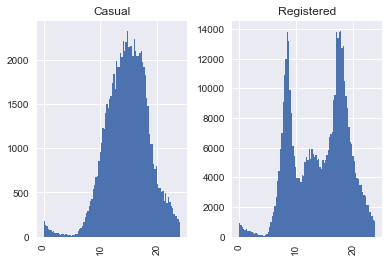

In [7]:
_ = bikes.hist('hour_of_day', by='Member Type', bins=100)

Casual 84967
Registered 467432


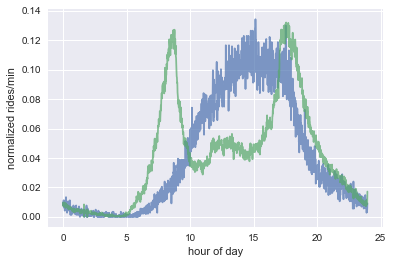

In [8]:
bins = np.arange(0, 24, 1/60.)
for member_type, group in bikes.groupby('Member Type'):
    print(member_type, len(group))
    rides_per_min, hour_edges = np.histogram(group.hour_of_day, bins=bins, normed=True)
    
    
    plt.plot(hour_edges[:-1], rides_per_min, alpha=0.7)


    plt.gca().set(xlabel='hour of day', ylabel='normalized rides/min')

# Data

The abov histogram represents the distribution of the number of rides per minute versus hour of the day. Registered users naturally aligns with commuters, who ride out in the morning for work and return home in the evening. Similarly, unregistered users follow the pattern of taking afternoon bikes rides. We'll take a look at registered users first to see if we can fit a line. 

In [9]:
#Subset registered users
registered = bikes['Member Type'] == 'Registered'
registered = bikes[registered]
registered.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end,hour_of_day
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00,23.983333
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,23.983333
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,23.983333
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00,23.950000
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00,23.950000


In [10]:
bikes['Member Type'].value_counts()

Registered    467432
Casual         84967
Name: Member Type, dtype: int64

[<matplotlib.text.Text at 0x1180c1978>, <matplotlib.text.Text at 0x1180e1ac8>]

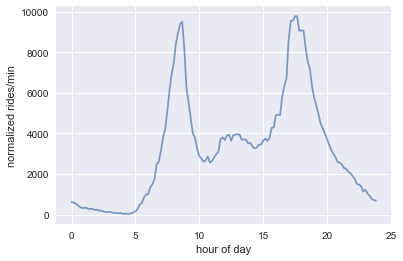

In [11]:
rides_per_min, hour_edges = np.histogram(registered.hour_of_day, bins=144)
plt.plot(hour_edges[:-1], rides_per_min, alpha=0.7)


plt.gca().set(xlabel='hour of day', ylabel='normalized rides/min')

In [12]:
x = hour_edges[:-1].reshape(-1,1)
y = rides_per_min
x.shape, y.shape

((144, 1), (144,))

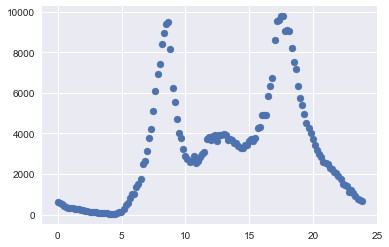

In [13]:
plt.scatter(x,y)

# Linear Regression

Initial Linear and Ridge Regressions. 

In [14]:
linear = linear_model.LinearRegression()

linear.fit(x, y)

linear.coef_, linear.intercept_

(array([ 151.54184216]), 1441.436015325671)

In [15]:
ridge = linear_model.Ridge(alpha=0.5)

ridge.fit(x, y)

ridge.coef_, ridge.intercept_

(array([ 151.53086496]), 1441.566736160029)

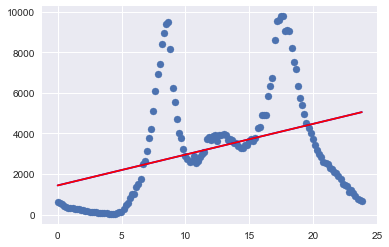

In [16]:
plt.scatter(x,y)
plt.plot(x, x*linear.coef_ + linear.intercept_, c='b')
plt.plot(x, x*ridge.coef_ + ridge.intercept_, c='r')

# Model 1: Registered
$X^5$

Model 1 is based on the 5th polynomial regression. This model was a good first attempt, but does not adhere to the distribution of points.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5)
x_5 = poly.fit_transform(x.reshape(-1, 1))

In [18]:
linear = linear_model.LinearRegression()

linear.fit(x_5, y)

(linear.coef_, linear.intercept_)

(array([  0.00000000e+00,  -1.29479915e+03,   5.18703483e+02,
         -5.85242669e+01,   2.79870041e+00,  -4.90464647e-02]),
 818.82257605440918)

In [19]:
ridge = linear_model.Ridge()

ridge.fit(x_5, y)

(ridge.coef_, ridge.intercept_)

(array([  0.00000000e+00,  -1.09579881e+03,   4.67865260e+02,
         -5.33686273e+01,   2.57254201e+00,  -4.54612662e-02]),
 623.74702397043529)

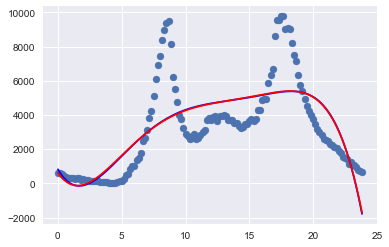

In [20]:
plt.scatter(x,y)
plt.plot(x, np.dot(x_5, linear.coef_) + linear.intercept_, c='b')
plt.plot(x, np.dot(x_5, ridge.coef_) + ridge.intercept_, c='r')

## Model 2: Registered users
$X^{10}$

The second model is based on the 10th order polynomial, and while it is an improvement over the first model, to the distribution of data only loosely follows the distibution but still has room for improvement for reaching the peaks. 

In [21]:
poly = PolynomialFeatures(degree=10)
x_10 = poly.fit_transform(x.reshape(-1, 1))

In [22]:
linear = linear_model.LinearRegression()
linear.fit(x_10, y)
# (linear.coef_, linear.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
ridge = linear_model.Ridge()
ridge.fit(x_10, y)
# (ridge.coef_, ridge.intercept_)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

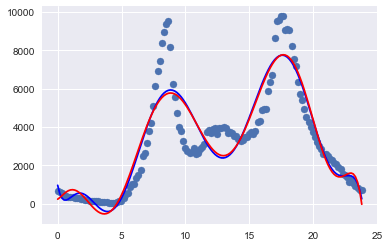

In [24]:
plt.scatter(x,y)
plt.plot(x, np.dot(x_10, linear.coef_) + linear.intercept_, c='b')
plt.plot(x, np.dot(x_10, ridge.coef_) + ridge.intercept_, c='r')

## Model 3: Registered Users
$X^{15}$

This model still needs some work, even after increasing the polynomial up to 15. While it is closer to the distribution, it doesn't quite meet it. 

In [25]:

poly = PolynomialFeatures(degree=15)
x_15 = poly.fit_transform(x.reshape(-1, 1))

In [26]:
linear = linear_model.LinearRegression()

linear.fit(x_15, y)

(linear.coef_, linear.intercept_)

(array([  0.00000000e+00,  -1.71098537e-04,   1.37452213e-06,
          9.77756616e-06,   6.17586404e-05,   3.42345287e-04,
          1.58122967e-03,   5.42847543e-03,   1.00593418e-02,
         -4.15278418e-03,   6.73782733e-04,  -5.91162943e-05,
          3.06453191e-06,  -9.42615247e-08,   1.59639800e-09,
         -1.14995062e-11]), 297.80348989698632)

In [27]:
ridge = linear_model.Ridge()

ridge.fit(x_15, y)

(ridge.coef_, ridge.intercept_)

/Users/katie/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.2779018907409753e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)


(array([  0.00000000e+00,   8.37558017e+02,   1.02068432e+03,
         -1.78397304e+03,   8.47512209e+02,  -1.96032853e+02,
          2.38851998e+01,  -8.93329250e-01,  -1.90076212e-01,
          3.75206141e-02,  -3.46704540e-03,   1.99400477e-04,
         -7.48898371e-06,   1.79678084e-07,  -2.51133227e-09,
          1.56036971e-11]), 128.80749723646386)

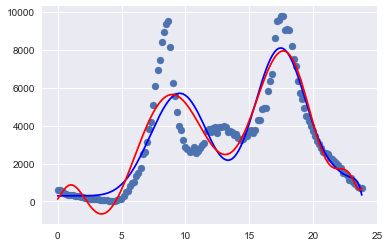

In [28]:
plt.scatter(x,y)
plt.plot(x, np.dot(x_15, linear.coef_) + linear.intercept_, c='b')
plt.plot(x, np.dot(x_15, ridge.coef_) + ridge.intercept_, c='r')

## Model 4: Registered users
$X^{30}$

This model, while is so far the best fit for this distribution, is overparameterized and the results are not guaranteed. A better model can be developed from casual users.

In [29]:

poly = PolynomialFeatures(degree=30)
x_30 = poly.fit_transform(x.reshape(-1, 1))

In [30]:
linear = linear_model.LinearRegression()

linear.fit(x_30, y)

(linear.coef_, linear.intercept_)

(array([ -1.00968546e-28,   3.40756842e-28,   1.77662554e-31,
          7.21181868e-34,  -2.16622531e-37,  -4.73239791e-39,
          0.00000000e+00,   0.00000000e+00,   1.03884386e-42,
          1.64852712e-41,   2.58429549e-40,   3.99714822e-39,
          6.08924329e-38,   9.11605249e-37,   1.33738829e-35,
          1.91595798e-34,   2.66848928e-33,   3.59279329e-32,
          4.64161220e-31,   5.69713810e-30,   6.55226016e-29,
          6.92034776e-28,   6.50588573e-27,   5.16267204e-26,
          3.11399392e-25,   1.07808445e-24,  -2.52179143e-25,
          2.29662938e-26,  -1.03824924e-27,   2.33896434e-29,
         -2.10332748e-31]), 2546.7378084394668)

In [31]:
ridge = linear_model.Ridge()

ridge.fit(x_30, y)

(ridge.coef_, ridge.intercept_)

/Users/katie/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.0475771562826528e-19
  ' condition number: {}'.format(rcond), RuntimeWarning)


(array([  0.00000000e+00,  -1.13191523e+03,  -4.19675144e+02,
          1.78983402e+03,  -1.01086728e+03,   2.12593424e+02,
         -1.04961387e+01,  -2.66217614e+00,   4.28629683e-01,
         -1.41207409e-02,  -1.64816107e-03,   1.66125469e-04,
         -4.49629303e-06,  -1.43268994e-08,  -3.54003167e-09,
          4.62466580e-10,  -1.15038033e-11,   2.30700450e-13,
         -1.66501880e-14,  -2.91302559e-16,   2.71041135e-17,
          2.40522241e-18,  -1.61322450e-19,   4.00188111e-21,
         -1.39823937e-22,   5.33822432e-24,  -2.43467275e-25,
          1.18924435e-26,  -1.36644782e-28,  -7.02909070e-30,
          1.50463307e-31]), 616.66671964857323)

In [32]:
ridge = linear_model.Ridge(alpha=2)

ridge.fit(x_30, y)

ridge.coef_, ridge.intercept_

/Users/katie/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.2425468784724455e-19
  ' condition number: {}'.format(rcond), RuntimeWarning)


(array([  0.00000000e+00,  -6.85554282e+02,   4.91887894e+02,
          1.54431391e+03,  -1.49162456e+03,   5.37306959e+02,
         -1.00209149e+02,   1.06781183e+01,  -6.70011886e-01,
          2.68957978e-02,  -1.15036777e-03,   6.96833844e-05,
         -2.52201677e-06,   1.12625232e-08,  -2.77525577e-10,
          1.52426571e-10,  -2.85406387e-12,  -1.90533916e-13,
          4.65144009e-15,  -4.40943109e-16,   6.54284380e-17,
         -3.21276412e-18,   5.46162752e-20,   1.39338454e-21,
         -1.40609888e-22,   7.29231211e-24,  -3.67362980e-25,
          1.57909949e-26,  -4.10094118e-28,   4.86512193e-30,
         -1.37270075e-32]), 39.775484297010735)

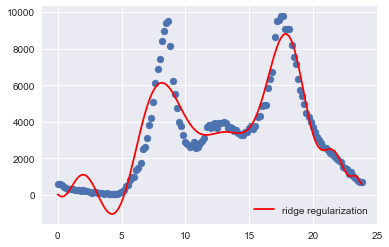

In [33]:
plt.scatter(x,y)
# plt.plot(x, np.dot(x_30, linear.coef_) + linear.intercept_, c='b', label='no regularization')
plt.plot(x, np.dot(x_30, ridge.coef_) + ridge.intercept_, c='r', label='ridge regularization')
plt.legend()

# Fit line to casual users

It was pretty difficult fitting a line to the registered commuters, so let's take a look at the unregistered, leisurely riders.


In [274]:
casual = bikes['Member Type'] == 'Casual'
casual = bikes[casual]
casual.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end,hour_of_day
5,967713,3/31/2016 23:57,4/1/2016 0:13,31266,11th & M St NW,31600,5th & K St NW,W20562,Casual,2016-03-31 23:57:00,2016-04-01 00:13:00,23.95
12,1680745,3/31/2016 23:54,4/1/2016 0:22,31258,Lincoln Memorial,31269,3rd St & Pennsylvania Ave SE,W01191,Casual,2016-03-31 23:54:00,2016-04-01 00:22:00,23.90
13,1687026,3/31/2016 23:54,4/1/2016 0:23,31258,Lincoln Memorial,31269,3rd St & Pennsylvania Ave SE,W20449,Casual,2016-03-31 23:54:00,2016-04-01 00:23:00,23.90
15,1001144,3/31/2016 23:51,4/1/2016 0:08,31106,Calvert & Biltmore St NW,31226,34th St & Wisconsin Ave NW,W22196,Casual,2016-03-31 23:51:00,2016-04-01 00:08:00,23.85
16,1262663,3/31/2016 23:51,4/1/2016 0:12,31111,10th & U St NW,31226,34th St & Wisconsin Ave NW,W21553,Casual,2016-03-31 23:51:00,2016-04-01 00:12:00,23.85


In [275]:
# Set up x,y

[<matplotlib.text.Text at 0x132739898>, <matplotlib.text.Text at 0x132729f28>]

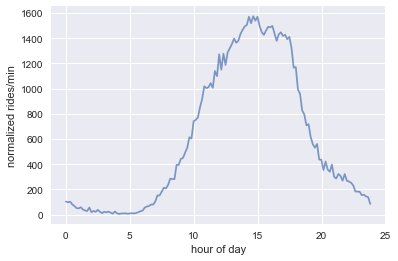

In [276]:
rides_per_min, hour_edges = np.histogram(casual.hour_of_day, bins=144)
plt.plot(hour_edges[:-1], rides_per_min, alpha=0.7)


plt.gca().set(xlabel='hour of day', ylabel='normalized rides/min')

In [277]:
x = hour_edges[:-1].reshape(-1,1)
y = rides_per_min
x.shape, y.shape

((144, 1), (144,))

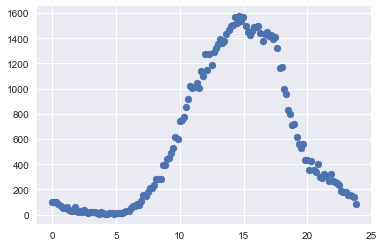

In [278]:
plt.scatter(x,y)

# Model 1: Casual users
$X^5$

This first model based on the 5th order polynomial fits the data distribution pretty well, but the prediction will be off, considering lack of adherence to right tail of the distribution. 

In [279]:
poly = PolynomialFeatures(degree=5)
x_5 = poly.fit_transform(x.reshape(-1, 1))

In [280]:
linear = linear_model.LinearRegression()
linear.fit(x_5, y)
# (linear.coef_, linear.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [281]:
ridge = linear_model.Ridge()
ridge.fit(x_5, y)
# (ridge.coef_, ridge.intercept_)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

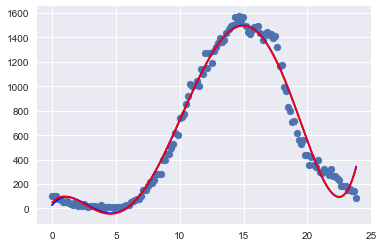

In [282]:
plt.scatter(x,y)
plt.plot(x, np.dot(x_5, linear.coef_) + linear.intercept_, c='b')
plt.plot(x, np.dot(x_5, ridge.coef_) + ridge.intercept_, c='r')

## Model 2: Casual users
$X^{10}$

The second model is based on the 10th order polynomial, and it fits the model quite well until the end. So, we'll try another polynomial level. 

In [283]:
poly = PolynomialFeatures(degree=10)
x_10 = poly.fit_transform(x.reshape(-1, 1))

In [284]:
linear = linear_model.LinearRegression()
linear.fit(x_10, y)
# (linear.coef_, linear.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [285]:
ridge = linear_model.Ridge(alpha=10)

ridge.fit(x_10, y)
# (ridge.coef_, ridge.intercept_)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

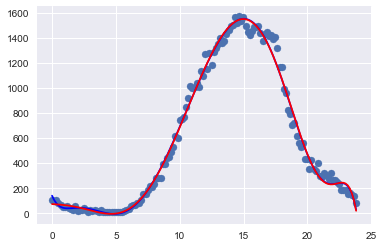

In [286]:
plt.scatter(x,y)
plt.plot(x, np.dot(x_10, linear.coef_) + linear.intercept_, c='b')
plt.plot(x, np.dot(x_10, ridge.coef_) + ridge.intercept_, c='r')

### Model 3: Casual users
$X^{15}$

The third model is based on the 15th order polynomial, and it fits the model quite well when the alpha is higher, set in this case, set to 10. In contrast,when the model is run with less regularization, and alpha is set to 2, the estimator is more volatile, and does not adhere as well to the distribution of data.

That said, it is difficult to add prediction points to this model, since the model needs to learn from all the data. So, I will switch to fitting a line to the day of the year rather than limit to the hour of a day.

In [287]:
poly = PolynomialFeatures(degree=15)
x_15 = poly.fit_transform(x.reshape(-1, 1))

In [288]:
linear = linear_model.LinearRegression()
linear.fit(x_15, y)
# (linear.coef_, linear.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [297]:
ridge = linear_model.Ridge(alpha=10)

ridge.fit(x_15, y)
# (ridge.coef_, ridge.intercept_)

/Users/katie/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.7830788529549406e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)


Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

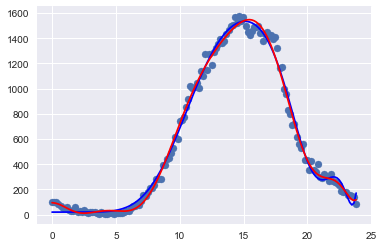

In [298]:
plt.scatter(x,y)
plt.plot(x, np.dot(x_15, linear.coef_) + linear.intercept_, c='b')
plt.plot(x, np.dot(x_15, ridge.coef_) + ridge.intercept_, c='r')

## Model 1: Rides per day of year (all riders), divided into week
$X^{3}$

The first model is based on the 3rd order polynomial, with x this time as day of the year and y as rides per week. The data is subsetted to not include the last points to test (instead of adding random data points for comparison). Because we are looking at only a few data points, though, the polynomial level has to remain very low, like between 1 and 3. Also, because we are dealing with a much smaller polynomial, the alpha level of the ridge has minimal effect on the fit of the line. 

[<matplotlib.text.Text at 0x12f9f4dd8>, <matplotlib.text.Text at 0x12f984f98>]

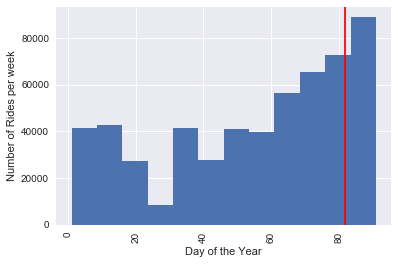

In [132]:
# bins = np.arange(bikes.start.min(), bikes.start.max(), timedelta(days=1))
# bins = pd.timedelta_range(start=bikes.start.min(), periods=100, freq='D')
bikes.start.dt.dayofyear.hist(bins=90//7)
plt.axvline(82, color='r', zorder=2)
plt.xticks(rotation=90)
plt.gca().set(xlabel='Day of the Year',
        ylabel='Number of Rides per week')

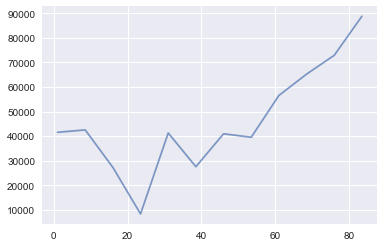

In [129]:
rides_per_week, week_bins = np.histogram(bikes.start.dt.dayofyear, bins=12)

# plot the above data
plt.plot(week_bins[:-1], rides_per_week, alpha=0.7)

In [197]:
x = week_bins[:-1].reshape(-1,1)
x = x[:-2]
y = rides_per_week
y = y[:-2]
x.shape, y.shape

((10, 1), (10,))

In [198]:
poly = PolynomialFeatures(degree=3)
x_3 = poly.fit_transform(x.reshape(-1, 1))

In [199]:
linear = linear_model.LinearRegression()
linear.fit(x_3, y)
# (linear.coef_, linear.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [200]:
ridge = linear_model.Ridge(alpha=2)

ridge.fit(x_3, y)
# (ridge.coef_, ridge.intercept_)

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

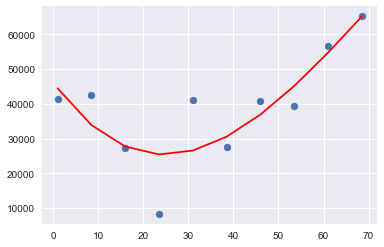

In [201]:
plt.scatter(x,y)
# plt.plot(x, np.dot(x_3, linear.coef_) + linear.intercept_, c='b')
plt.plot(x, np.dot(x_3, ridge.coef_) + ridge.intercept_, c='r')

In [262]:
# Check predictions

x_all = week_bins[:-1].reshape(-1,1)
y_all = rides_per_week

poly = PolynomialFeatures(degree=3)
x_all_3 = poly.fit_transform(x_all.reshape(-1, 1))

x_all.shape, y_all.shape, x_all_3.shape

((12, 1), (12,), (12, 4))

In [263]:
ridge = linear_model.Ridge(alpha=2)

ridge.fit(x_3, y)
# (ridge.coef_, ridge.intercept_)

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

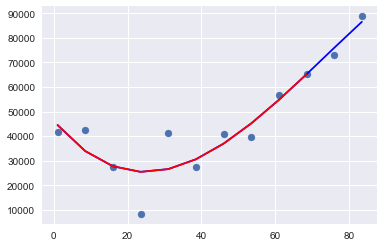

In [265]:
plt.scatter(x_all, y_all)
# plt.plot(x, np.dot(x_5, linear.coef_) + linear.intercept_, c='b')
plt.plot(x_all, np.dot(x_all_3, ridge.coef_) + ridge.intercept_, c='b')
plt.plot(x, np.dot(x_3, ridge.coef_) + ridge.intercept_, c='r')


# Model 2: Rides per day of year (all riders), divided into week
$X^{5}$

The second model based on a 5th order polynomial still doesn't adhere that well to the distribution of data and even applying this high of an order may results in skewed predictions, as depicted below. Therefore, with this few data points and the level order of polynomial, the predictions are unreliable, and the 3rd order polynomial is best to go with. 


In [250]:
poly = PolynomialFeatures(degree=5)
x_5 = poly.fit_transform(x.reshape(-1, 1))

In [251]:
linear = linear_model.LinearRegression()
linear.fit(x_5, y)
# (linear.coef_, linear.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [252]:
ridge = linear_model.Ridge(alpha=2)

ridge.fit(x_5, y)
# (ridge.coef_, ridge.intercept_)

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

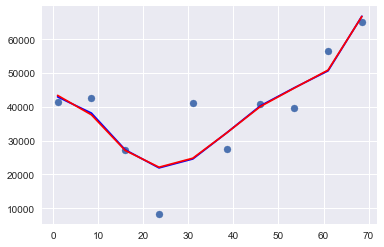

In [253]:
plt.scatter(x,y)
plt.plot(x, np.dot(x_5, linear.coef_) + linear.intercept_, c='b')
plt.plot(x, np.dot(x_5, ridge.coef_) + ridge.intercept_, c='r')

In [254]:
# Check predictions

x_all = week_bins[:-1].reshape(-1,1)
y_all = rides_per_week

poly = PolynomialFeatures(degree=5)
x_all_5 = poly.fit_transform(x_all.reshape(-1, 1))

x_all.shape, y_all.shape, x_all_5.shape

((12, 1), (12,), (12, 6))

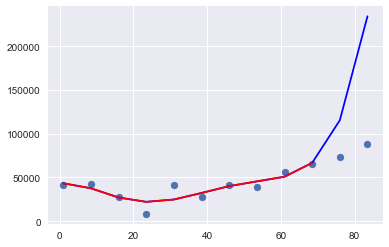

In [255]:
plt.scatter(x_all, y_all)
# plt.plot(x, np.dot(x_5, linear.coef_) + linear.intercept_, c='b')
plt.plot(x_all, np.dot(x_all_5, ridge.coef_) + ridge.intercept_, c='b')
plt.plot(x, np.dot(x_5, ridge.coef_) + ridge.intercept_, c='r')
